In [1]:
# Question 8: Implementing Dropout Regularization
# Description: Add dropout layers to the neural network to mitigate overfitting.

2025-05-24 04:30:05.737205: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748061005.751772    6648 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748061005.756266    6648 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1748061005.769132    6648 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1748061005.769144    6648 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1748061005.769146    6648 computation_placer.cc:177] computation placer alr

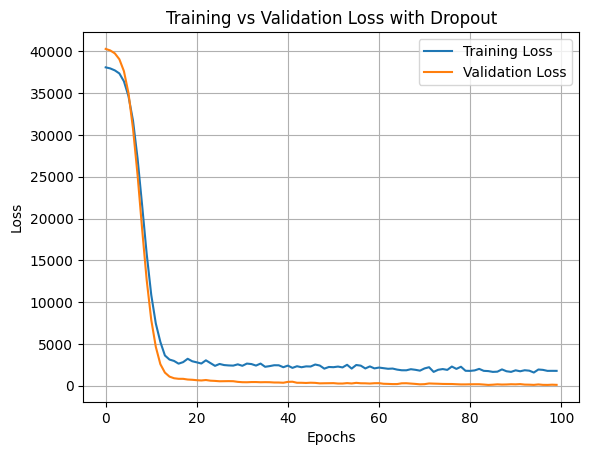

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# 1. Generate synthetic data
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1)
y = y.reshape(-1, 1)

# 2. Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Build neural network with Dropout layers
model = Sequential([
    Dense(64, activation='relu', input_shape=(X.shape[1],)),
    Dropout(0.5),  # Drop 50% of the neurons during training
    Dense(64, activation='relu'),
    Dropout(0.3),  # Drop 30% of the neurons during training
    Dense(1)
])

# 4. Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# 5. Train the model
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=100,
                    batch_size=32,
                    verbose=0)

# 6. Plot training vs validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss with Dropout')
plt.legend()
plt.grid(True)
plt.show()
